In [110]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from copy import deepcopy
from sklearn.svm import SVC
from operator import index, itemgetter
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# done by us
from auxFunctions import *

In [67]:
df = pd.read_csv('Proj1_Dataset.csv')

for feature in df.columns:
  df = df[df[feature].notna()]
  
df_features = df.drop(['Date','Time','Persons'], axis=1)

df_output = df['Persons']

df_dates = df['Date']


# Z-Score

In [68]:
standard = StandardScaler().fit_transform(df_features.values)

project_df = pd.DataFrame(standard, index=df_features.index, columns=df_features.columns)


# Temperature

/tmp/ipykernel_10175/1429151312.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_10175/1429151312.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


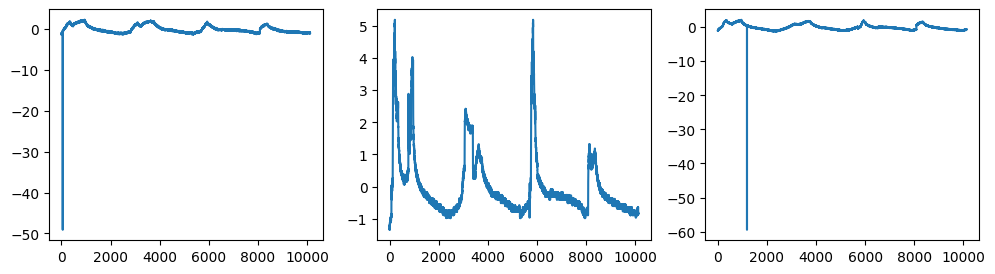

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Temp.plot()
plt.subplot(1,3,2)
project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Temp.plot(ax=plt.gca())
plt.show()

# Light

/tmp/ipykernel_10175/955311149.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_10175/955311149.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


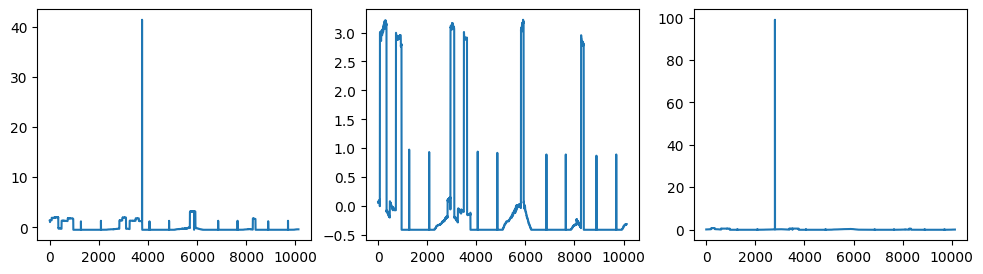

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Light.plot()
plt.subplot(1,3,2)
project_df.S2Light.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Light.plot(ax=plt.gca())
plt.show()

# CO2

<AxesSubplot: >

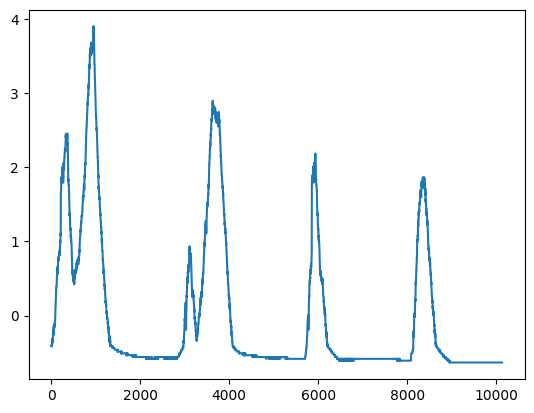

In [71]:
project_df['CO2'].plot()

# PIR

/tmp/ipykernel_10175/3791813093.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_10175/3791813093.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


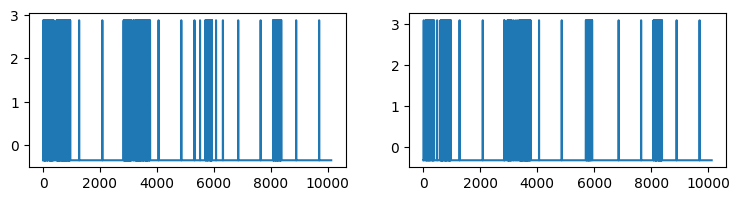

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(9, 2))
plt.subplot(1,2,1)
project_df.PIR1.plot()
plt.subplot(1,2,2)
project_df.PIR2.plot(ax=plt.gca())
plt.show()

# Removing Basic Outliers

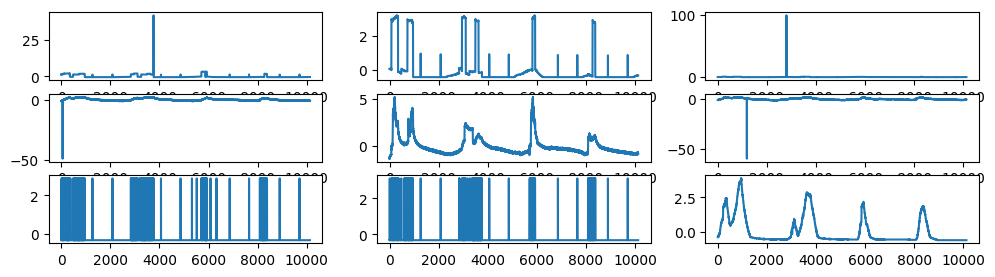

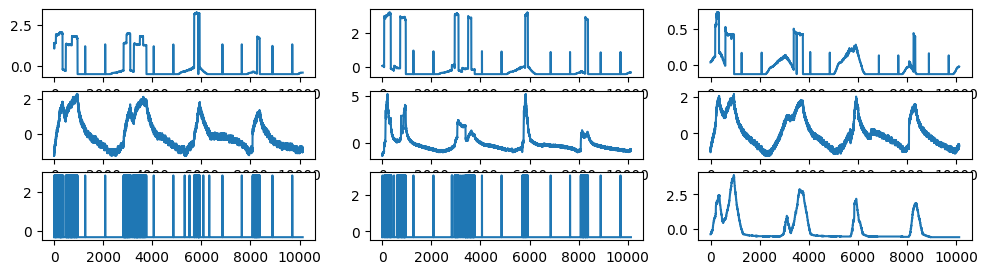

In [73]:
# FIGURE
fig, axs = plt.subplots(3, 3, figsize=(12, 3))
# LIGHT
plt.subplot(3,3,1)
project_df.S1Light.plot()
plt.subplot(3,3,2)
project_df.S2Light.plot(ax=plt.gca())
plt.subplot(3,3,3)
project_df.S3Light.plot(ax=plt.gca())
# TEMP
plt.subplot(3,3,4)
project_df.S1Temp.plot()
plt.subplot(3,3,5)
project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(3,3,6)
project_df.S3Temp.plot(ax=plt.gca())
# PIR
plt.subplot(3,3,7)
project_df.PIR1.plot()
plt.subplot(3,3,8)
project_df.PIR2.plot(ax=plt.gca())
# CO2
plt.subplot(3,3,9)
project_df.CO2.plot(ax=plt.gca())
plt.show()

outliers = getOutliersFromAverage(project_df, 6)
new_project_df = removeLine(project_df, outliers)
new_output_df = removeLine(df_output, outliers)
new_dates_df = removeLine(df_dates, outliers)

# FIGURE
fig, axs = plt.subplots(3, 3, figsize=(12, 3))
# LIGHT
plt.subplot(3,3,1)
new_project_df.S1Light.plot()
plt.subplot(3,3,2)
new_project_df.S2Light.plot(ax=plt.gca())
plt.subplot(3,3,3)
new_project_df.S3Light.plot(ax=plt.gca())
# TEMP
plt.subplot(3,3,4)
new_project_df.S1Temp.plot()
plt.subplot(3,3,5)
new_project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(3,3,6)
new_project_df.S3Temp.plot(ax=plt.gca())
# PIR
plt.subplot(3,3,7)
new_project_df.PIR1.plot()
plt.subplot(3,3,8)
new_project_df.PIR2.plot(ax=plt.gca())
# CO2
plt.subplot(3,3,9)
new_project_df.CO2.plot(ax=plt.gca())
plt.show()


# Analysis

In [74]:
X = new_project_df.to_numpy()
y = new_output_df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Nearest Neighbors

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1594
           1       1.00      0.98      0.99        92
           2       0.93      0.98      0.96       177
           3       0.98      0.91      0.95       162

    accuracy                           0.99      2025
   macro avg       0.98      0.97      0.97      2025
weighted avg       0.99      0.99      0.99      2025


Linear SVM

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1594
           1       0.97      0.97      0.97        92
           2       0.88      0.84      0.86       177
           3       0.83      0.80      0.81       162

    accuracy                           0.97      2025
   macro avg       0.92      0.90      0.91      2025
weighted avg       0.97      0.97      0.97      2025


RBF SVM

              precision    recall  f1-score   support

           0       1.00      1.00

/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1594
           1       0.97      0.97      0.97        92
           2       0.93      0.91      0.92       177
           3       0.89      0.87      0.88       162

    accuracy                           0.98      2025
   macro avg       0.95      0.94      0.94      2025
weighted avg       0.98      0.98      0.98      2025


Naive Bayes

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1594
           1       1.00      0.96      0.98        92
           2       0.84      0.70      0.76       177
           3       0.57      0.81      0.67       162

    accuracy                           0.93      2025
   macro avg       0.85      0.86      0.85      2025
weighted avg       0.95      0.93      0.94      2025




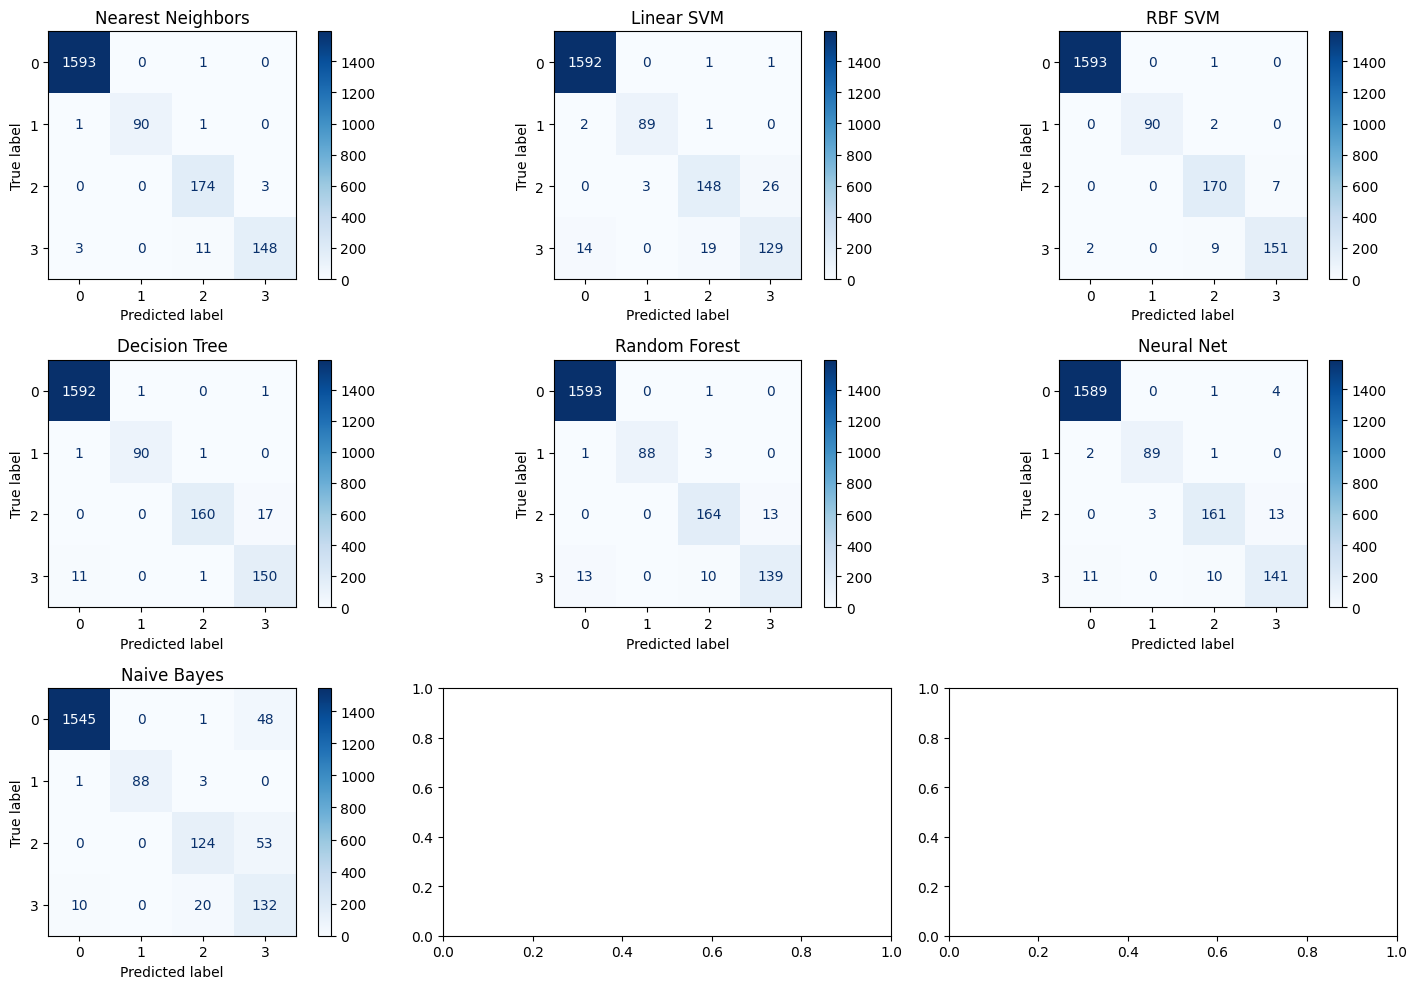

In [18]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Naive Bayes"
]

classifiers = [
    KNeighborsClassifier(4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),  # type: ignore
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # type: ignore
    MLPClassifier(alpha=1, max_iter=100),
    GaussianNB()
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for name, clf, ax in zip(names, classifiers, axes.flatten()): # type: ignore
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=mpl.cm.Blues, ax=ax)
    
    ax.title.set_text(name)
    
    print(name)
    print()
    print(classification_report(y_test, y_pred))
    print()

plt.tight_layout()
plt.show()


- [ ] Validation set
- [ ] MLP hidden layers
- [ ] Fuzzy
- [ ] Relatório

In [59]:
activations = ["relu", "tanh", "logistic"]
hidden_layer_sizes = [(1), (18), (18, 9), (18, 18)]
random_states = [2, 4, 8]
max_iters = [10, 100, 300]

accuracies = []
combinations = []

for act in activations:
  for hid in hidden_layer_sizes:
    for ran in random_states:
      for it in max_iters:
        clf = MLPClassifier(hidden_layer_sizes=hid, activation=act, random_state=ran, max_iter=it)
        
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        
        accuracies.append(classification_report(y_test, y_pred, output_dict=True)['accuracy']) # type: ignore
        combinations.append(str(act) + " " + str(hid) + " " + str(ran) + " " + str(it))

/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [117]:
dates_np = new_dates_df.to_numpy()

split_index = np.where(dates_np >= '15/01/2021')[0][0]

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# index, value = max(enumerate(accuracies), key=itemgetter(1))

# best_combination = combinations[index].split(" ")

# act, hid, ran, it = best_combination

# hid = ast.literal_eval(hid)
# ran = int(ran)
# it = int(it)

# clf = MLPClassifier(hidden_layer_sizes=hid, activation=act, random_state=ran, max_iter=it)
        
# y_pred = clf.fit(X_train, y_train).predict(X_test)

# print(classification_report(y_test, y_pred, output_dict=True)['accuracy']) # type: ignore

# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=mpl.cm.Blues)
# plt.show()

activations = ["relu", "tanh", "logistic"]
hidden_layer_sizes = [(1), (18), (18, 9), (18, 18)]
random_states = [2, 4, 8]
max_iters = [10, 100, 300]

accuracies = []
combinations = []

for act in activations:
  for hid in hidden_layer_sizes:
    for ran in random_states:
      for it in max_iters:
        clf = MLPClassifier(hidden_layer_sizes=hid, activation=act, random_state=ran, max_iter=it)
        
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        
        accuracies.append(classification_report(y_test, y_pred, output_dict=True)['accuracy']) # type: ignore
        combinations.append(str(act) + " " + str(hid) + " " + str(ran) + " " + str(it))

/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [120]:
index, value = max(enumerate(accuracies), key=itemgetter(1))

print(combinations[index])

tanh (18, 9) 2 10


/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

0.9026894865525672


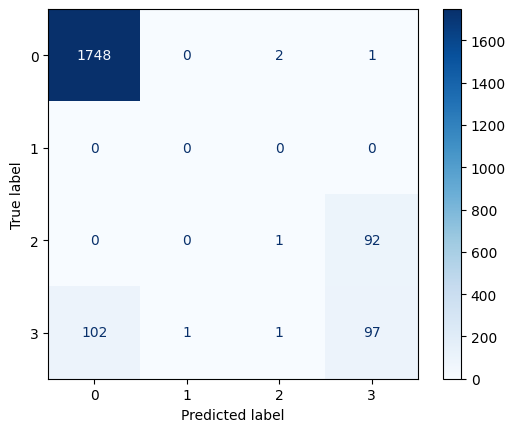

In [123]:
clf = MLPClassifier(hidden_layer_sizes=(18, 9), activation="tanh", random_state=2, max_iter=10)
        
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, output_dict=True)['accuracy']) # type: ignore

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=mpl.cm.Blues)
plt.show()